# Finding integrators for cholesterol regulation models

We here look at a chemical reaction network describing the cholesterol regulation in 
See [arXiv:2307.07444](https://arxiv.org/abs/2307.07444) for more details.


## Installation Instructions

This notebook uses the following packages:

- `pandas`
- `ipython`
- `rpa_finder`

You can install these packages using the following commands:

```bash
pip install pandas ipython rpa_finder


## Definitions of functions for displaying results

In [1]:
from rpa_finder.reaction_system import ReactionSystem
from IPython.display import Markdown, display


def find_affected_species(lbs_list, reaction_id):
    filtered = [lbs[1] for lbs in lbs_list if reaction_id in lbs[0]]
    return set(filtered[0])


def display_integrators(integrators):
    for i in range(4):
        display( Markdown("$\\frac{d}{dt}" + integrators[2*i] + "=" + integrators[2*i+1] + "$") )
    return




## A cholesterol regulation model

We here consider a model discussed in [https://doi.org/10.3389/fcell.2023.1244297](https://doi.org/10.3389/fcell.2023.1244297).


In [2]:

network_cholesterol_simple =  [
            ['', '"S_{ci}"'],  #1 
            ['"S_{ci}"', '"S_{ci}" + "S_r" + "S_h" + "S_p"'], #2 
            ['"S_r"', '"S_r" + "R"'],  #3
            ['"S_h"', '"S_h" + "H_R"'], #4
            ['"S_p"', '"S_p" + "P"'],  #5
            ['"S_r"', ''],   #6
            ['"S_h"', ''],   #7
            ['"S_p"', ''],   #8
            ['"R"', '"R" + "C_f"'],  #9
            ['"R"', ''],    #10
            ['"P" + "R"', '"P"'], #11
            ['"P"', ''],      #12
            ['"C_f"', '"C_p"'], #13
            ['"C_p"', '"C_e"'], #14
            ['"C_e"', '"C_p"'], #15
            ['"C_e"', '"E"'],  #16
            ['"E"', '"C_e"'],  #17
            ['', '"H"'],      #18
            ['"H" + "H_R"', '"H_R" + "C_e"'], #19
            ['"C_e" + "H_R"', '"C_e"'],  #20
            ['"C_e"', '"C_e" + "C"'],   #21
            ['"S_{ci}" + "C"', ''],     #22
            ['"C_e"', '']              #23
        ]


system_cholesterol_simple = ReactionSystem(network_cholesterol_simple)
lbs_cholesterol_simple = system_cholesterol_simple.enumerate_labeled_buffering_structures()




Let us find the integrators for a chosen labeled buffering structure:


In [3]:

num = 17

print("Let us find the integrators for the following labeled buffering structure:")
print(lbs_cholesterol_simple[num])

display_integrators( system_cholesterol_simple.find_integrators_from_lbs(lbs_cholesterol_simple[num]) )

Let us find the integrators for the following labeled buffering structure:
[[22], [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 22], [18, 21]]


$\frac{d}{dt}\left[\begin{matrix}- x_{C} + x_{S_{ci}}\end{matrix}\right]=\left[\begin{matrix}r_{1} - r_{21}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}x_{C_e} + \frac{x_{C_f}}{3} + \frac{2 x_{C_p}}{3} + x_{H}\\x_{E}\end{matrix}\right]=\left[\begin{matrix}- \frac{r_{15}}{3} - r_{16} + r_{17} + r_{18}\\r_{16} - r_{17}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}- x_{H}\\- \frac{x_{C}}{2} - \frac{x_{S_{ci}}}{2}\end{matrix}\right]=\left[\begin{matrix}- r_{18} + r_{19}\\- \frac{r_{1}}{2} - \frac{r_{21}}{2} + r_{22}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}\end{matrix}\right]=\left[\begin{matrix}\end{matrix}\right]$

A table summarizing the RPA properties of all the species and reactions is obtained as follows.

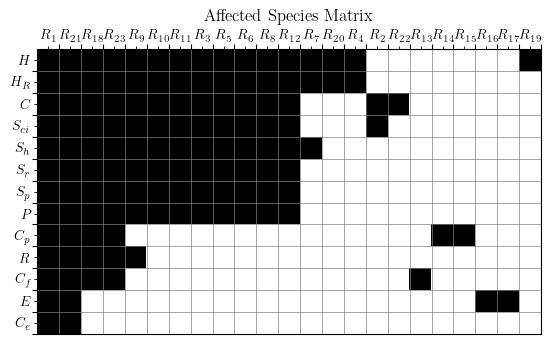

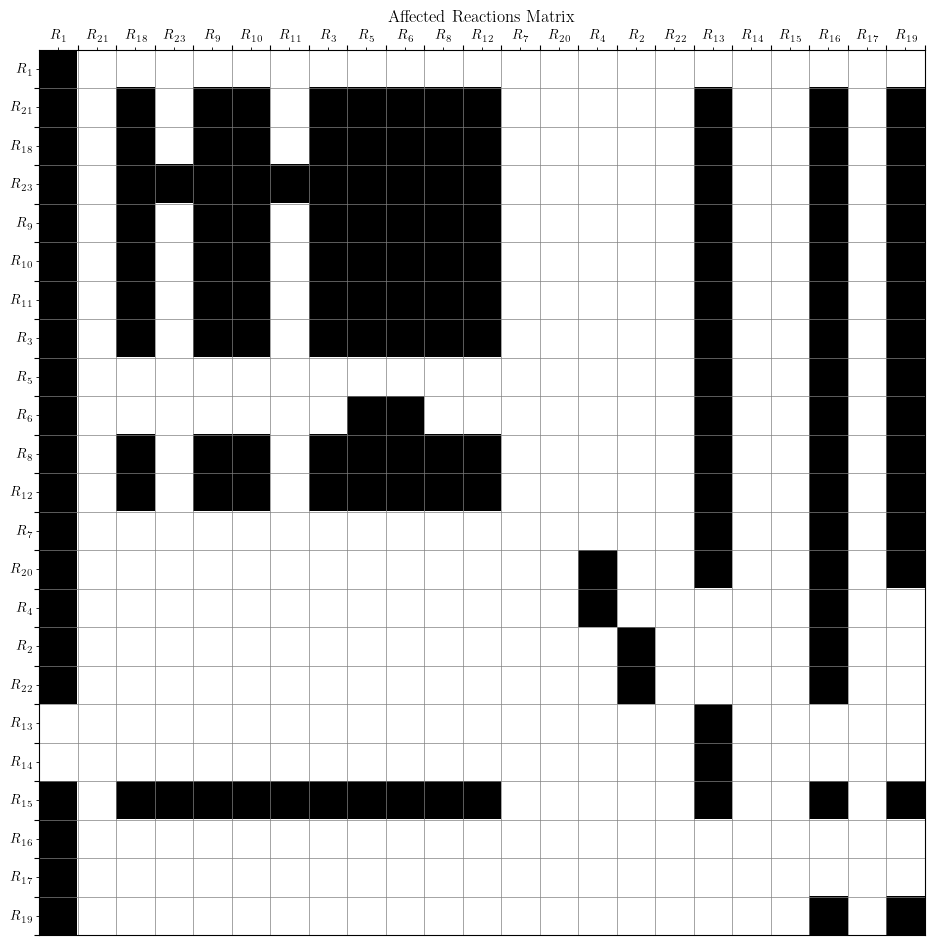

In [4]:
system_cholesterol_simple.draw_affected_matrix()


## Cholesterol regulation model with compartments

Below is a compartmental model discussed in [https://www.biorxiv.org/content/10.1101/2024.03.14.584346.abstract](https://www.biorxiv.org/content/10.1101/2024.03.14.584346.abstract)

In [5]:

network_cholesterol_comp = """
"", "S_{ci}"
"C_e", "C_e" + "C"
"S_{ci}" + "C", ""
"S_{ci}", "S_{ci}" + "S_r" + "S_h" + "S_p" + "S_b"
"S_r", "S_r" + "R"
"S_h", "S_h" + "H_R"
"S_p", "S_p" + "P"
"S_b", "S_b" + "R_b"
"S_r", ""
"S_h", ""
"S_p", ""
"S_b", ""
"R", "R"+ "C_f"
"R_b","R_b"+ "C_f"
"R", ""
"R_b", ""
"P"+"R", "P" 
"P", ""
"C_f", "C_p"
"C_p", "C_e"
"C_e", "C_p"
"C_e", "E"
"E", "C_e"
"", "H"
"H"+"H_R", "H_R"+ "C_e"
"C_e"+"H_R", "C_e"
"C_p"+"C_O", "C_g"
"C_e", ""
"C_e" + "C_g", "B"
"B", ""
"", "S_{ci}^1"
"C_e^1", "C_e^1" + "C_1"
"S_{ci}^1" + "C_1", ""
"S_{ci}^1", "S_{ci}^1" + "S_b^1" + "S_h^1"
"S_h^1", "S_h^1" + "H_R^1"
"S_b^1", "S_b^1" + "R_b^1"
"S_h^1", ""
"S_p^2", ""
"S_b^1", ""
"R_b^1", "R_b^1"+ "C_f^1"
"R_b^1", ""
"C_f^1", "C_p^1"
"C_p^1", "C_O"
"C_p^1", "C_e^1"
"C_e^1", "C_p^1"
"C_e^1", "E_1"
"E_1", "C_e^1"
"", "H_1"
"H_1"+"H_R^1", "H_R^1"+ "C_e^1"
"C_e^1"+"H_R^1", "C_e^1"
"C_e^1", ""
"", "S_{ci}^2"
"C_e^2", "C_e^2" + "C_2"
"S_{ci}^2" + "C_2", ""
"S_{ci}^2", "S_{ci}^2" + "S_h^2" + "S_r^2" + "S_p^2"
"S_r^2", "S_r^2" + "R_2"
"S_h^2", "S_h^2" + "H_R^2"
"S_p^2", "S_p^2" + "P_2"
"S_r^2", ""
"S_h^2", ""
"R_2", "R_2"+ "C_f^2"
"R_2", ""
"P_2"+"R_2", "P_2"
"P_2", ""
"C_f^2", "C_p^2"
"C_p^2", "C_e^2"
"C_e^2", "C_p^2"
"", "H_2"
"H_2"+"H_R^2", "H_R^2"+ "C_e^2"
"C_e^2"+"H_R^2", "C_e^2"
"C_e^2", ""
"""


system_cholesterol_comp = ReactionSystem(network_cholesterol_comp)
lbs_cholesterol_comp = system_cholesterol_comp.enumerate_labeled_buffering_structures()
lbs_cholesterol_comp_name = [ system_cholesterol_comp.lbs_to_name(l) for l in lbs_cholesterol_comp]





We look for species that exhibit RPA with respect to CL, CH, CH1, CL2, which correspond to reactions 12, 13, 39, and 60.

In [6]:
species_12 = find_affected_species(lbs_cholesterol_comp, 12)
species_13 = find_affected_species(lbs_cholesterol_comp, 13)
species_39 = find_affected_species(lbs_cholesterol_comp, 39)
species_60 = find_affected_species(lbs_cholesterol_comp, 60)

affected_species = species_12.union( species_13, species_39, species_60)

print("\nAffected species:", affected_species)

all_species_id = set(range(len(system_cholesterol_comp.species)) )

rpa_species = set( all_species_id ) - affected_species
rpa_species = list(rpa_species)

print("\nIndices of species that exhibit RPA w.r.t. CL, CH, CH1, CL2")
print(rpa_species)

affected_species = list(affected_species)
rs = system_cholesterol_comp.find_reactions_to_add(affected_species, [])

print("\nReactions to be added to make the subnetwork output-complete:", rs)
bs_cholesterol_rpa = [affected_species, rs]


print("\ninfluence index:", system_cholesterol_comp.compute_influence_index(bs_cholesterol_rpa) )

print("\nWe will find integrators for the following buffering structure:")
print(bs_cholesterol_rpa)

integrators = system_cholesterol_comp.find_integrators_from_bs(bs_cholesterol_rpa, symbol_mode='subscript')

print("\nIntegrator equations:")

for i in range(2):
    display(Markdown('$\\frac{d}{dt}' + integrators[2*i] + '=' + integrators[2*i+1] + '$'))



Affected species: {1, 2, 3, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}

Indices of species that exhibit RPA w.r.t. CL, CH, CH1, CL2
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

Reactions to be added to make the subnetwork output-complete: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 24, 25, 32, 33, 34, 35, 36, 37, 38, 39, 40, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 68, 69]

influence index: 0

We will find integrators for the following buffering structure:
[[1, 2, 3, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 24, 25, 32, 33, 34, 35, 36, 37, 38, 39, 40, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 68, 69]]

Integrator equations:


$\frac{d}{dt}\left[\begin{matrix}- x_{C} + x_{S_{ci}}\\- x_{C_1} + x_{S_{ci}^1}\\- x_{C_2} + x_{S_{ci}^2}\end{matrix}\right]=\left[\begin{matrix}r_{1} - r_{2}\\r_{31} - r_{32}\\r_{52} - r_{53}\end{matrix}\right]$

$\frac{d}{dt}\left[\begin{matrix}x_{B}\\x_{C_O}\\x_{C_e} + x_{H}\\x_{C_e^1} + x_{H_1}\\x_{C_e^2} + x_{H_2}\\x_{C_g}\\x_{C_p}\\x_{C_p^1}\\x_{C_p^2}\\x_{E}\\x_{E_1}\end{matrix}\right]=\left[\begin{matrix}r_{29} - r_{30}\\- r_{27} + r_{43}\\r_{20} - r_{21} - r_{22} + r_{23} + r_{24} - r_{28} - r_{29}\\r_{44} - r_{45} - r_{46} + r_{47} + r_{48} - r_{51}\\r_{66} - r_{67} + r_{68} - r_{71}\\r_{27} - r_{29}\\r_{19} - r_{20} + r_{21} - r_{27}\\r_{42} - r_{43} - r_{44} + r_{45}\\r_{65} - r_{66} + r_{67}\\r_{22} - r_{23}\\r_{46} - r_{47}\end{matrix}\right]$

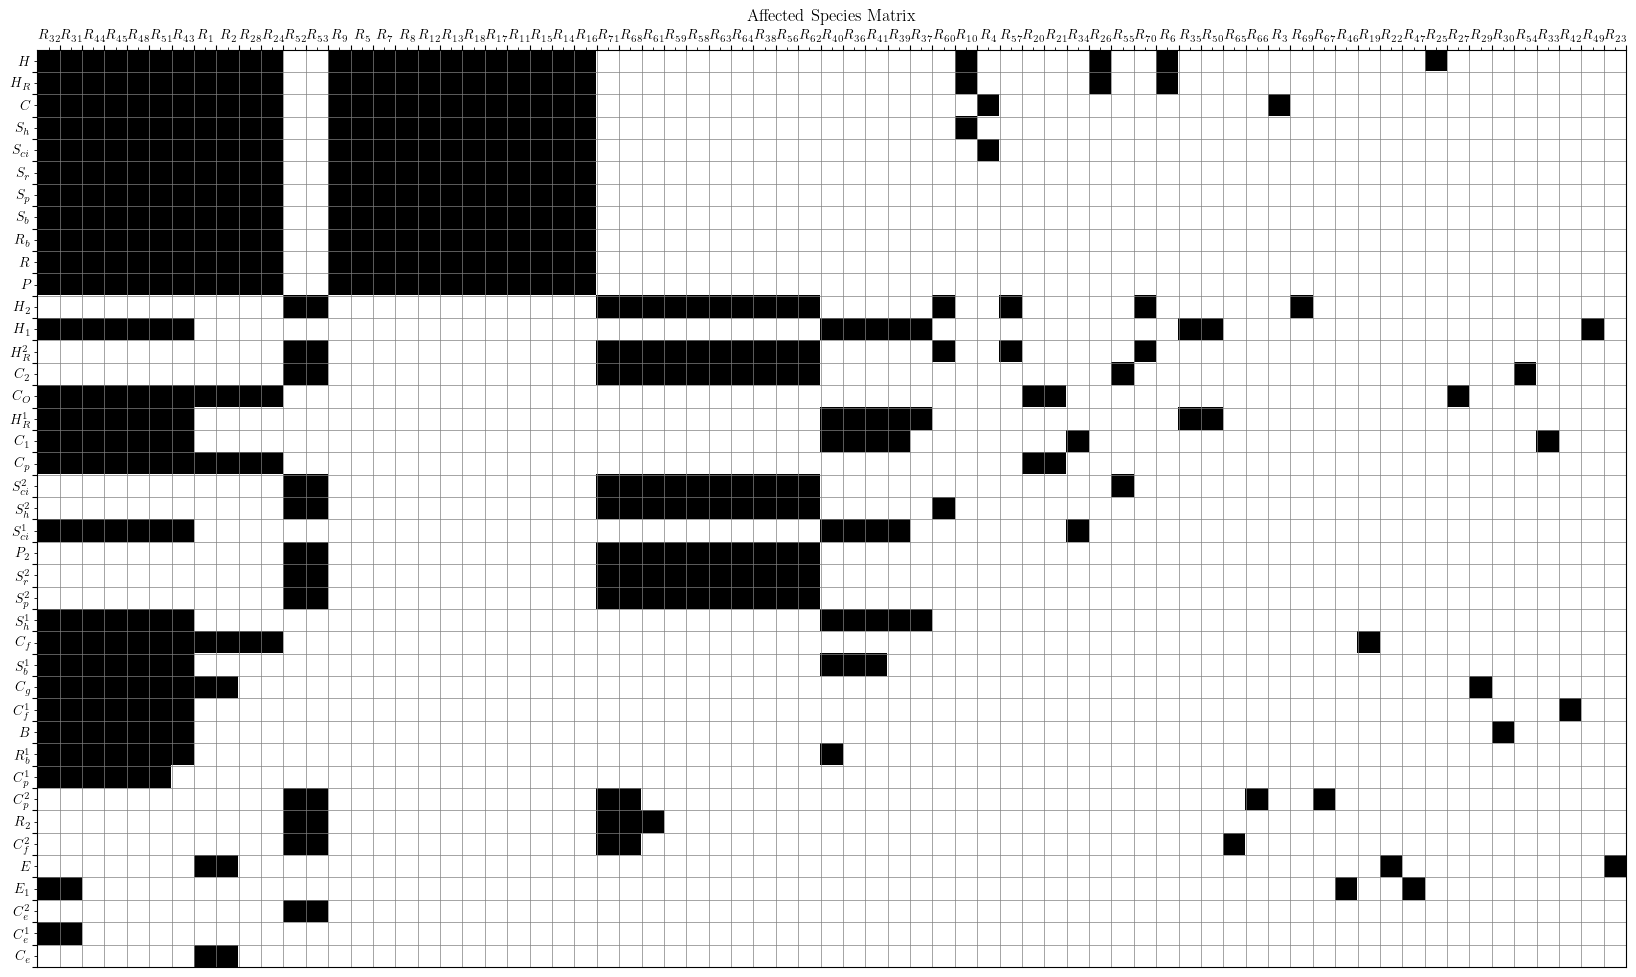

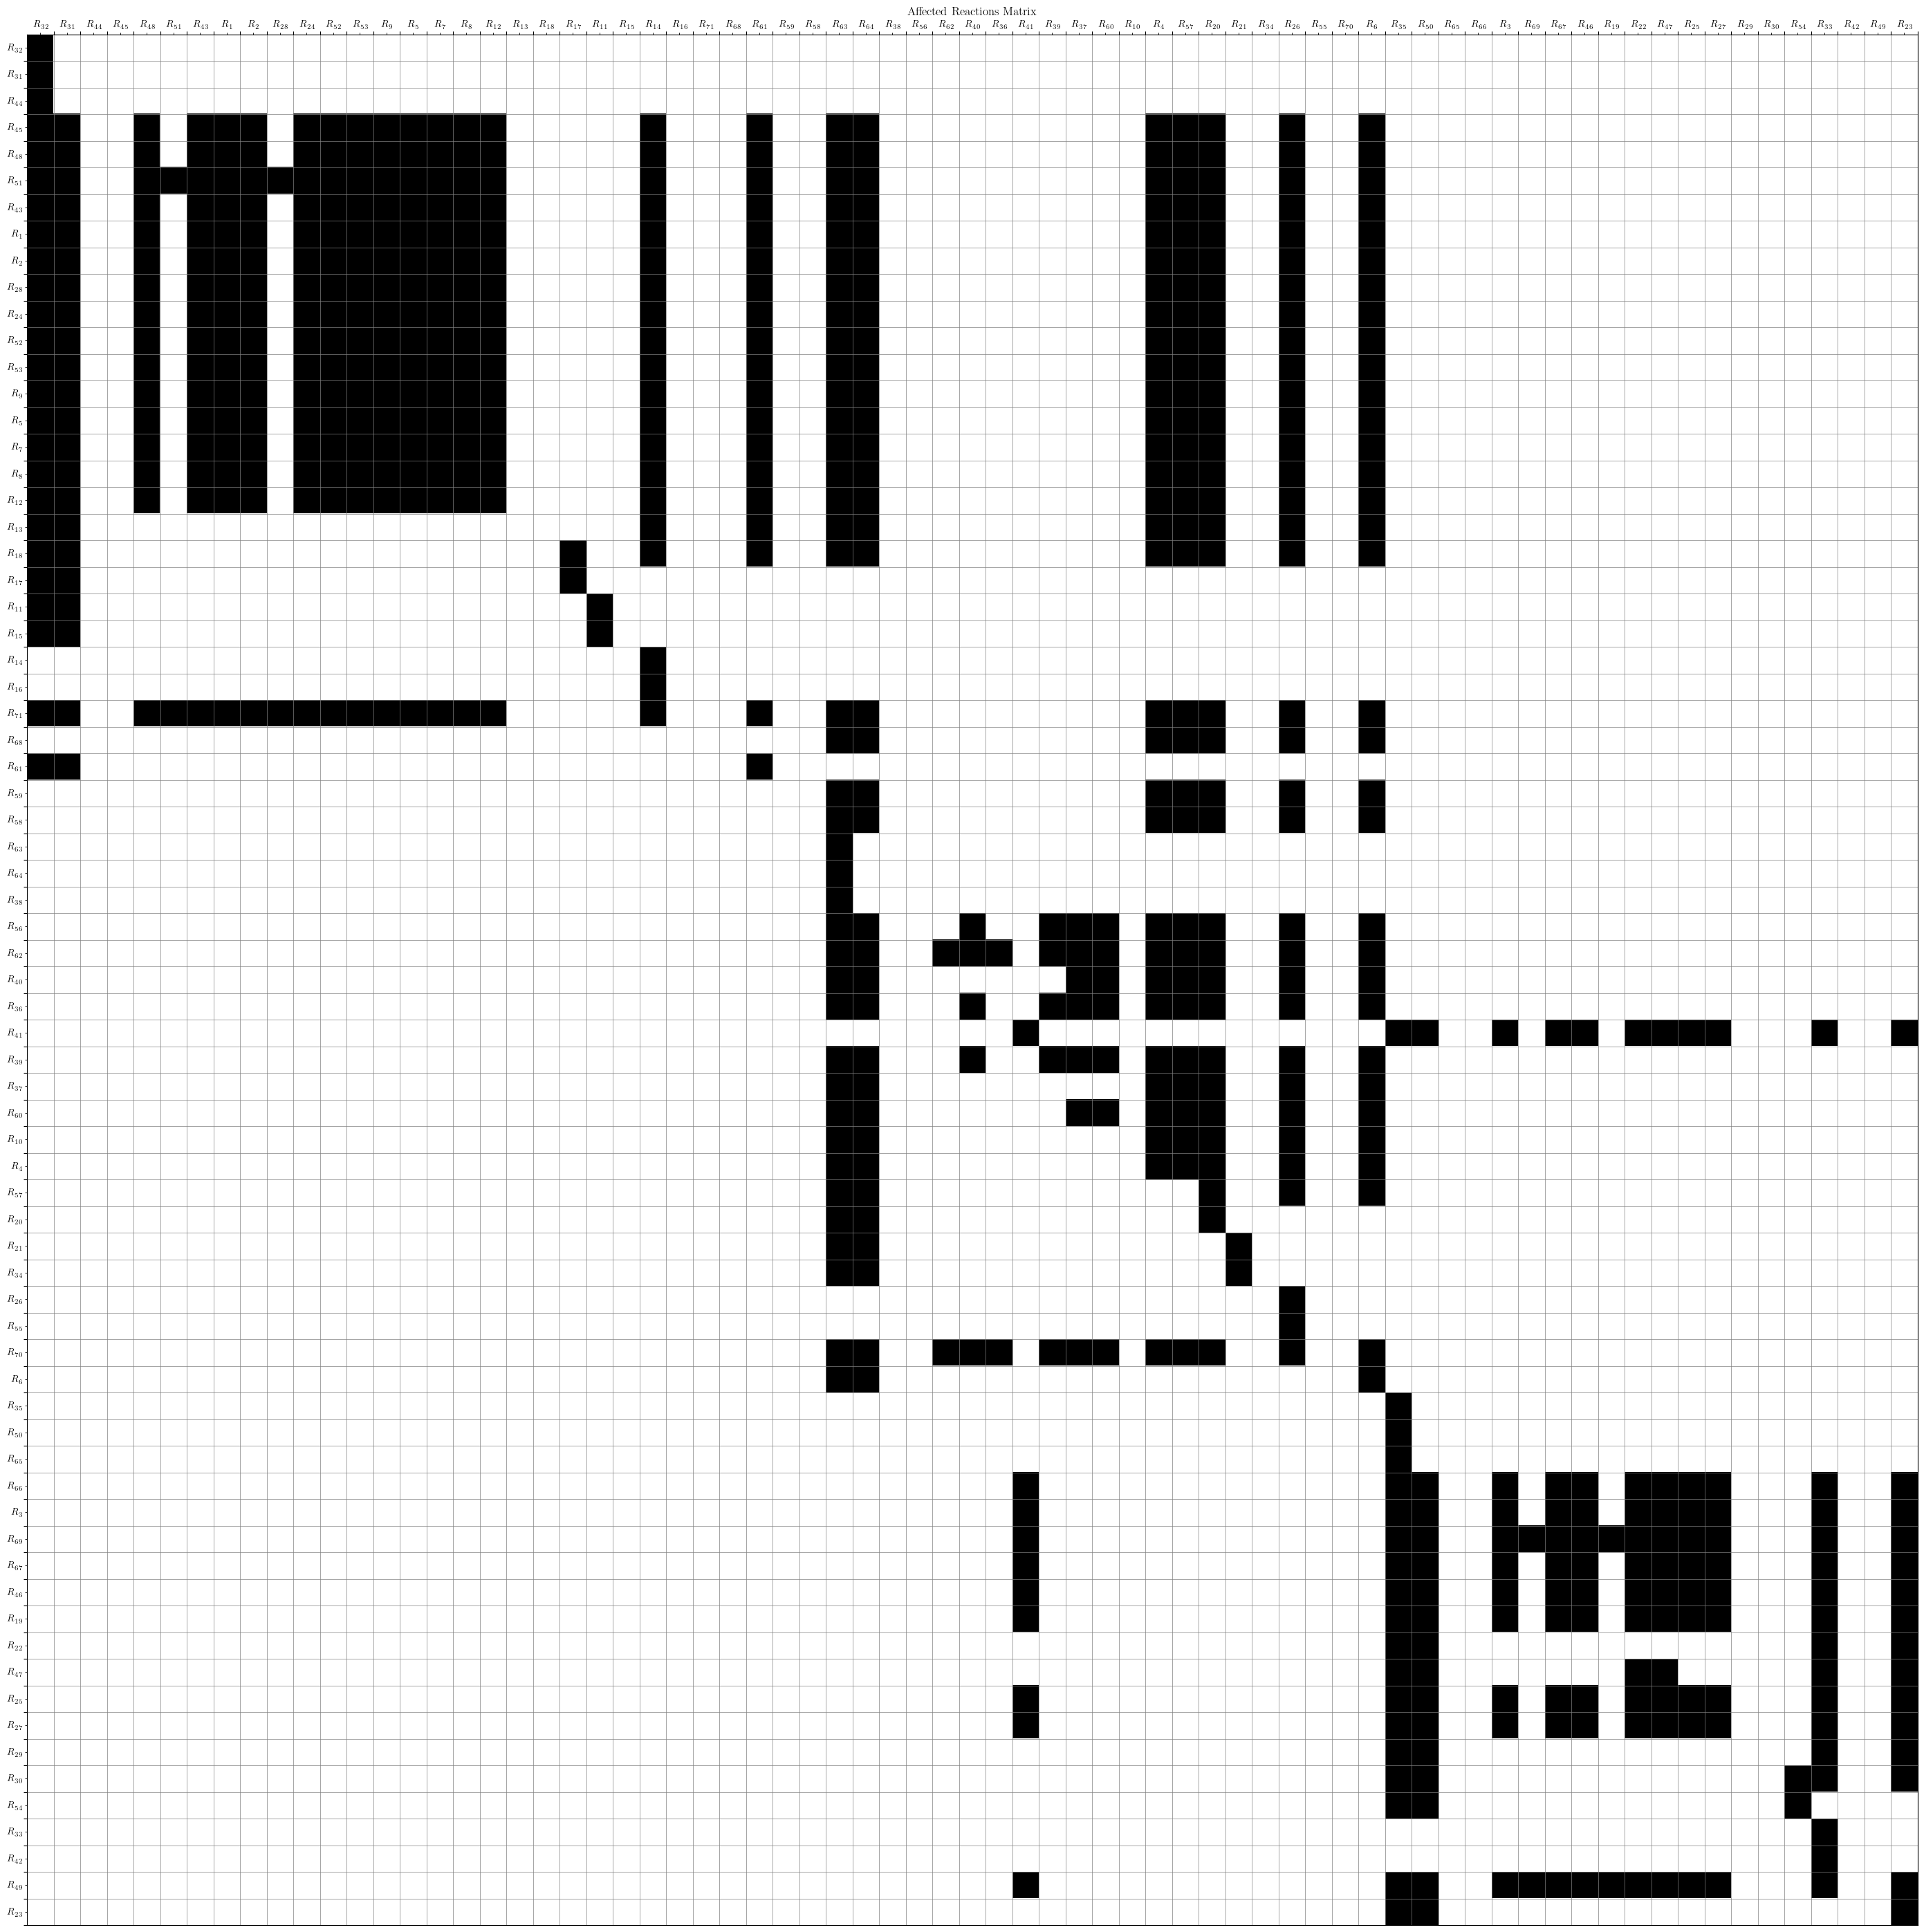

In [7]:
system_cholesterol_comp.draw_affected_matrix()
